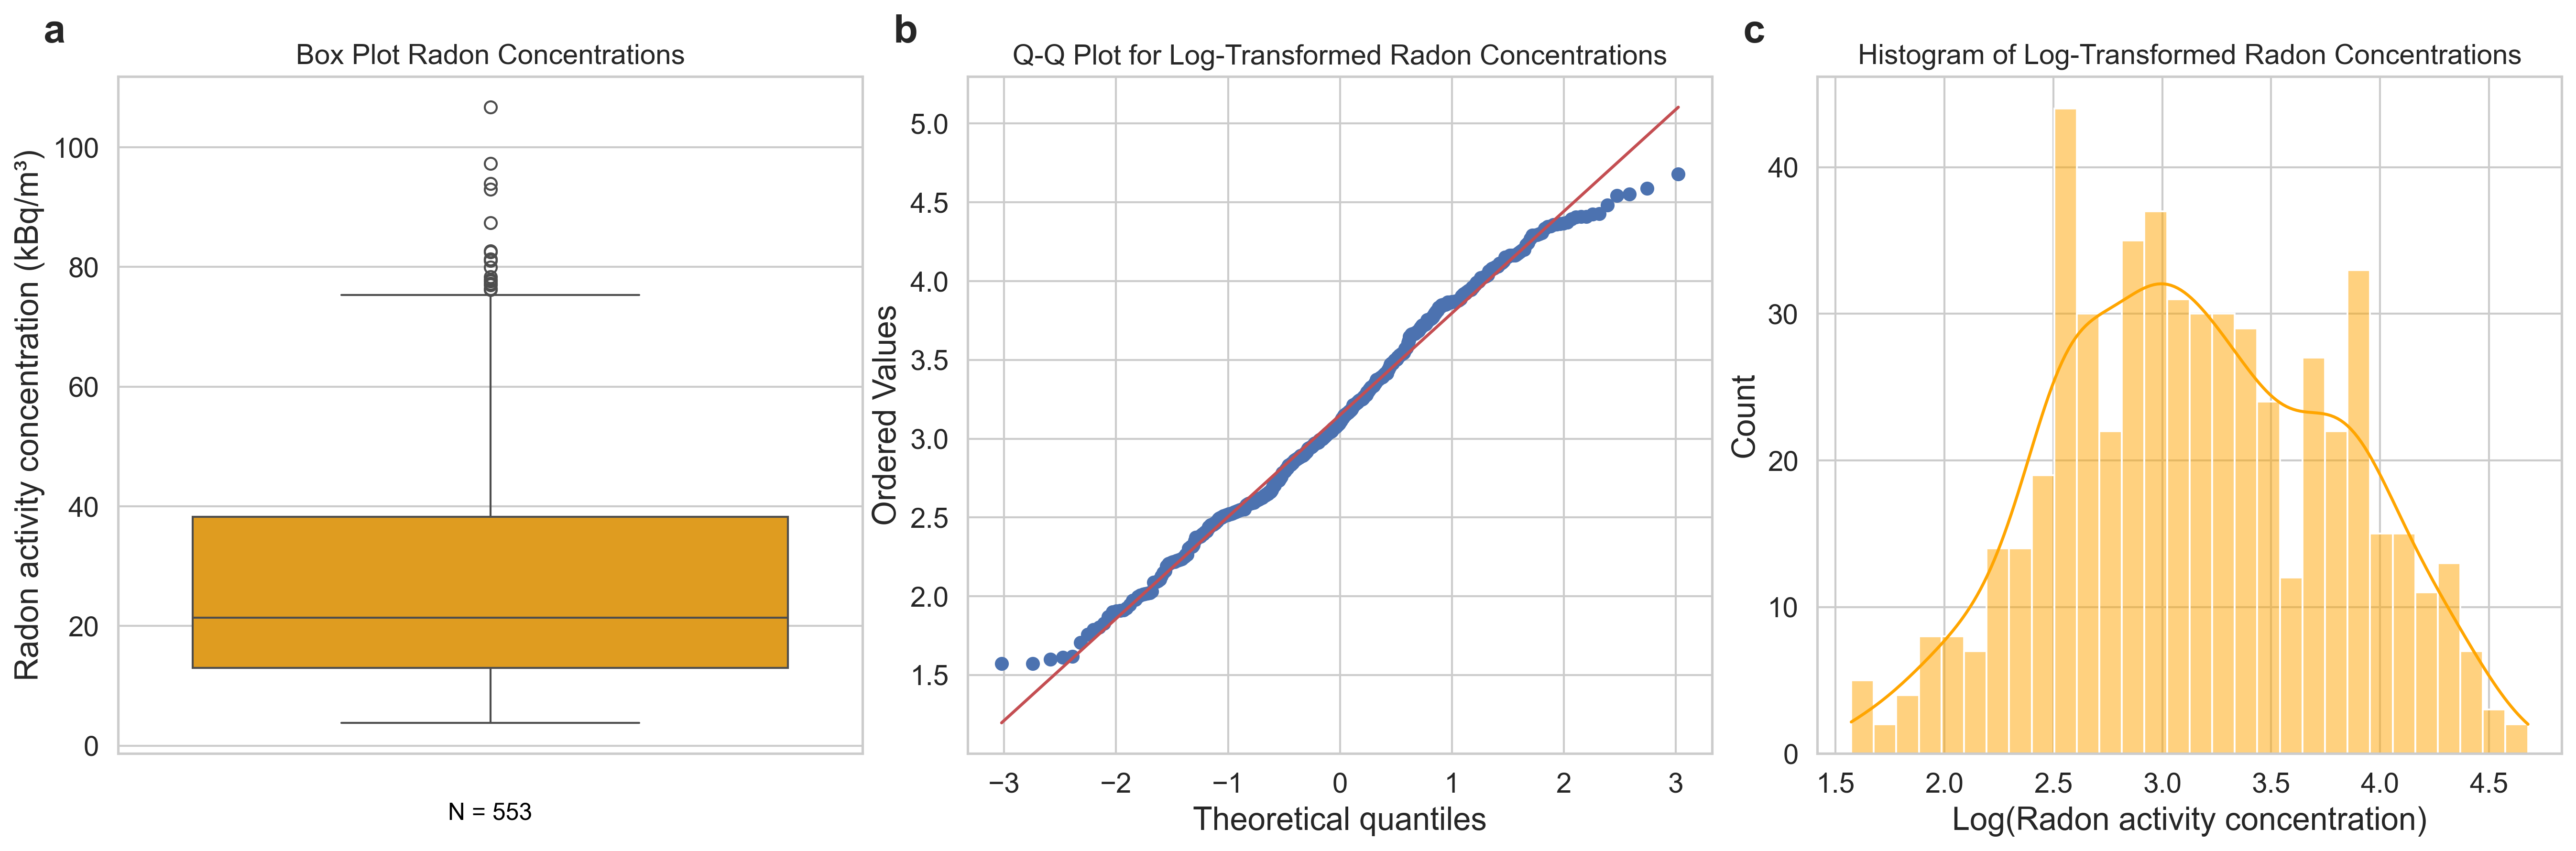

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

kzm_df = pd.read_excel('data.xlsx')

sns.set(style="whitegrid")

kzm_df['Radon_Level_kBq'] = kzm_df['Radon_Level'] / 1000
kzm_df['Log_Radon_Level_kBq'] = np.log(kzm_df['Radon_Level_kBq'] + 1)

kzm_df = kzm_df[~((kzm_df['Editor'] == 'Sarah') & (kzm_df['Distance2Closest_Fault'] > 600))]

shapiro_result = stats.shapiro(kzm_df['Log_Radon_Level_kBq'])

fig, axs = plt.subplots(1, 3, figsize=(18, 6), facecolor='w', dpi=300)

sns.boxplot(data=kzm_df, y='Radon_Level_kBq', ax=axs[0], color='orange')
axs[0].set_title('Box Plot Radon Concentrations', fontsize=14)
axs[0].set_ylabel('Radon activity concentration (kBq/m³)')
axs[0].text(-0.1, 1.05, 'a', transform=axs[0].transAxes, fontsize=20, weight='bold')
axs[0].text(0, axs[0].get_ylim()[0] - 10, f'N = {len(kzm_df)}', ha='center', va='center', fontsize=12, color='black')

stats.probplot(kzm_df['Log_Radon_Level_kBq'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot for Log-Transformed Radon Concentrations', fontsize=14)
axs[1].text(-0.1, 1.05, 'b', transform=axs[1].transAxes, fontsize=20, weight='bold')

sns.histplot(kzm_df['Log_Radon_Level_kBq'], bins=30, kde=True, ax=axs[2], color='orange')
axs[2].set_title('Histogram of Log-Transformed Radon Concentrations', fontsize=14)
axs[2].set_xlabel('Log(Radon activity concentration)')
axs[2].set_ylabel('Count')
axs[2].text(-0.1, 1.05, 'c', transform=axs[2].transAxes, fontsize=20, weight='bold')

plt.tight_layout()
for ax in axs.flat:
    ax.title.set_fontsize(14)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    ax.tick_params(axis='both', labelsize=14)

#plt.savefig('Figure2.pdf')
plt.show()
